In [14]:
#What types of advertizing gives you the best return on investment
#what advertizing provides the most units of sales per dollar
#

In [15]:
# Write all the code needed for your analysis here. 
# You can add more cells to this section if you would like
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import markdown

In [16]:
df = pd.read_csv("Advertising And Sales.csv", encoding='ISO-8859-1')

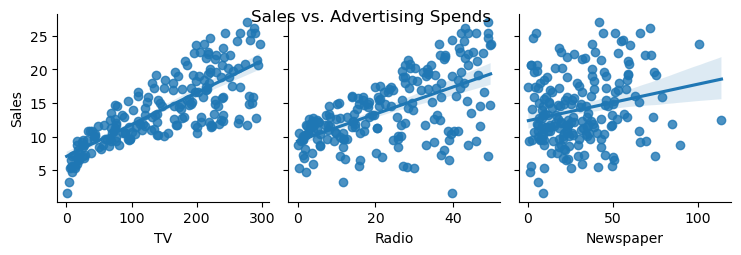

In [19]:
sns.pairplot(data=df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='reg')
plt.suptitle('Sales vs. Advertising Spends')
plt.show()

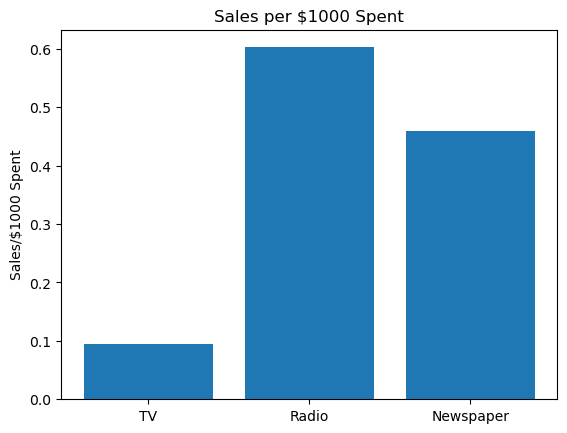

In [17]:

sales_per_dollar = {
    'TV': df['Sales'].sum() / df['TV'].sum(),
    'Radio': df['Sales'].sum() / df['Radio'].sum(),
    'Newspaper': df['Sales'].sum() / df['Newspaper'].sum()
}

plt.bar(sales_per_dollar.keys(), sales_per_dollar.values())
plt.title('Sales per $1000 Spent')
plt.ylabel('Sales/$1000 Spent')
plt.show()

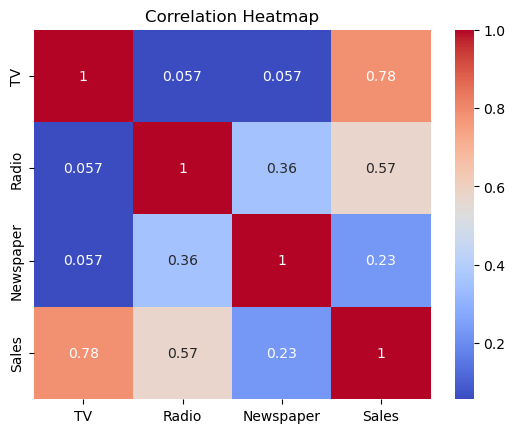

In [18]:
corr = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Regression coefficients: [ 0.04568635  0.18711007 -0.00132992]


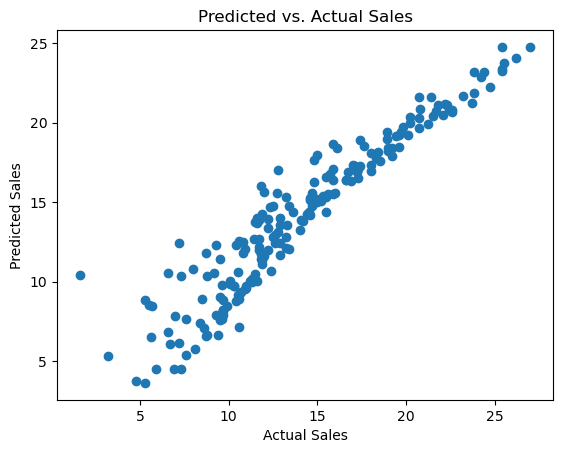

In [20]:
from sklearn.linear_model import LinearRegression

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

model = LinearRegression().fit(X, y)
print("Regression coefficients:", model.coef_)

# Visualize predicted vs. actual sales
y_pred = model.predict(X)
plt.scatter(y, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Predicted vs. Actual Sales")
plt.show()

***Write your answer here.***

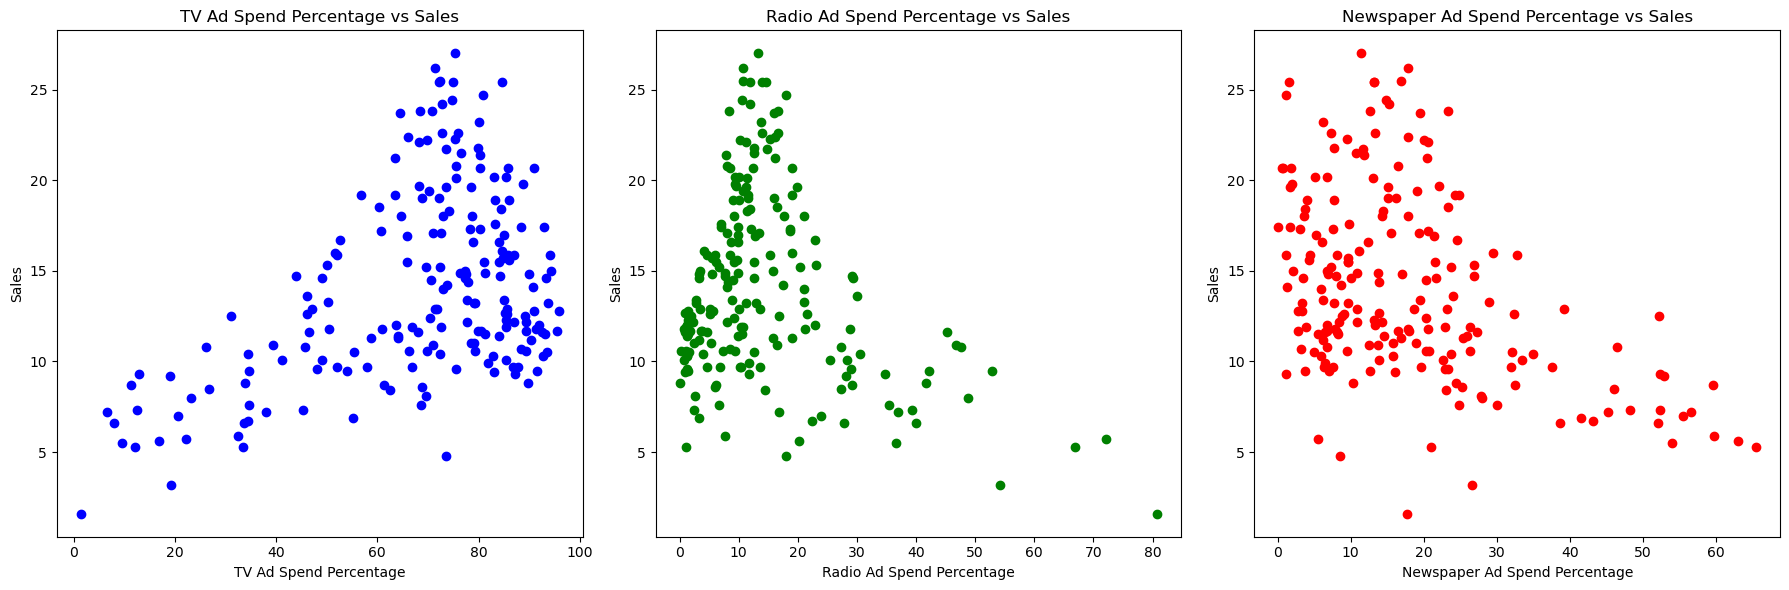

In [23]:
# Reassign the dataframe to the variable name 'df' for ease of use
df = pd.read_csv("Advertising And Sales.csv", encoding='ISO-8859-1')

# Recalculate the percentages of the budget spent on TV, Radio, and Newspaper ads in the new 'df'
df['TV_pct'] = df['TV'] / (df['TV'] + df['Radio'] + df['Newspaper']) * 100
df['Radio_pct'] = df['Radio'] / (df['TV'] + df['Radio'] + df['Newspaper']) * 100
df['Newspaper_pct'] = df['Newspaper'] / (df['TV'] + df['Radio'] + df['Newspaper']) * 100

# Create scatter plots to analyze the correlation between ad spend percentages and sales using 'df'
plt.figure(figsize=(18, 6))

# TV percentage vs Sales
plt.subplot(1, 3, 1)
plt.scatter(df['TV_pct'], df['Sales'], color='blue')
plt.title('TV Ad Spend Percentage vs Sales')
plt.xlabel('TV Ad Spend Percentage')
plt.ylabel('Sales')

# Radio percentage vs Sales
plt.subplot(1, 3, 2)
plt.scatter(df['Radio_pct'], df['Sales'], color='green')
plt.title('Radio Ad Spend Percentage vs Sales')
plt.xlabel('Radio Ad Spend Percentage')
plt.ylabel('Sales')

# Newspaper percentage vs Sales
plt.subplot(1, 3, 3)
plt.scatter(df['Newspaper_pct'], df['Sales'], color='red')
plt.title('Newspaper Ad Spend Percentage vs Sales')
plt.xlabel('Newspaper Ad Spend Percentage')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()


# My Answer

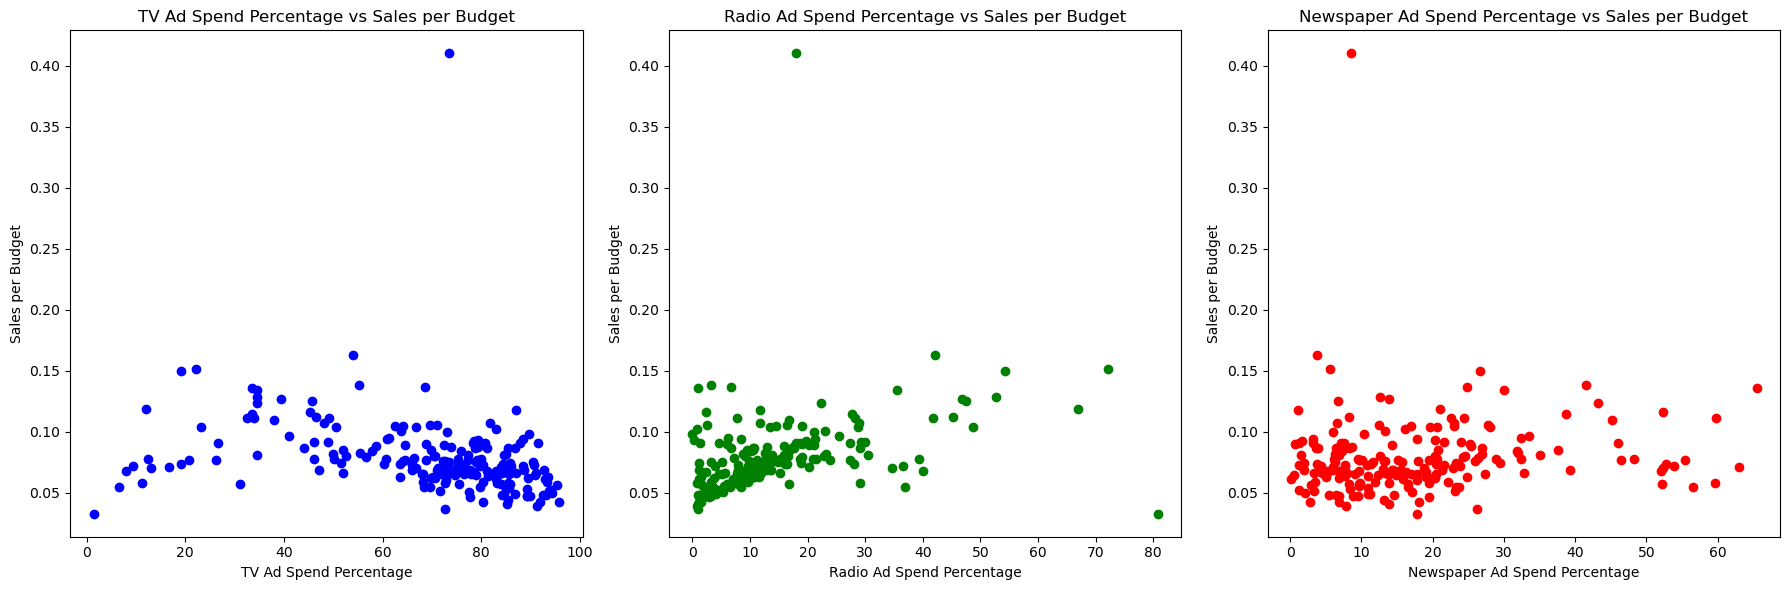

In [25]:
# Step 1: Calculate the total advertising budget
df['Total_Budget'] = df['TV'] + df['Radio'] + df['Newspaper']

# Step 2: Scale the sales to match the advertising budget
# Calculate sales per unit of budget
df['Sales_per_Budget'] = df['Sales'] / df['Total_Budget']

# Display the updated dataframe to check the new columns
df.head()


# Create scatter plots to analyze the correlation between ad spend percentages and sales per unit of budget

plt.figure(figsize=(18, 6))

# TV percentage vs Sales per Budget
plt.subplot(1, 3, 1)
plt.scatter(df['TV_pct'], df['Sales_per_Budget'], color='blue')
plt.title('TV Ad Spend Percentage vs Sales per Budget')
plt.xlabel('TV Ad Spend Percentage')
plt.ylabel('Sales per Budget')

# Radio percentage vs Sales per Budget
plt.subplot(1, 3, 2)
plt.scatter(df['Radio_pct'], df['Sales_per_Budget'], color='green')
plt.title('Radio Ad Spend Percentage vs Sales per Budget')
plt.xlabel('Radio Ad Spend Percentage')
plt.ylabel('Sales per Budget')

# Newspaper percentage vs Sales per Budget
plt.subplot(1, 3, 3)
plt.scatter(df['Newspaper_pct'], df['Sales_per_Budget'], color='red')
plt.title('Newspaper Ad Spend Percentage vs Sales per Budget')
plt.xlabel('Newspaper Ad Spend Percentage')
plt.ylabel('Sales per Budget')

plt.tight_layout()
plt.show()


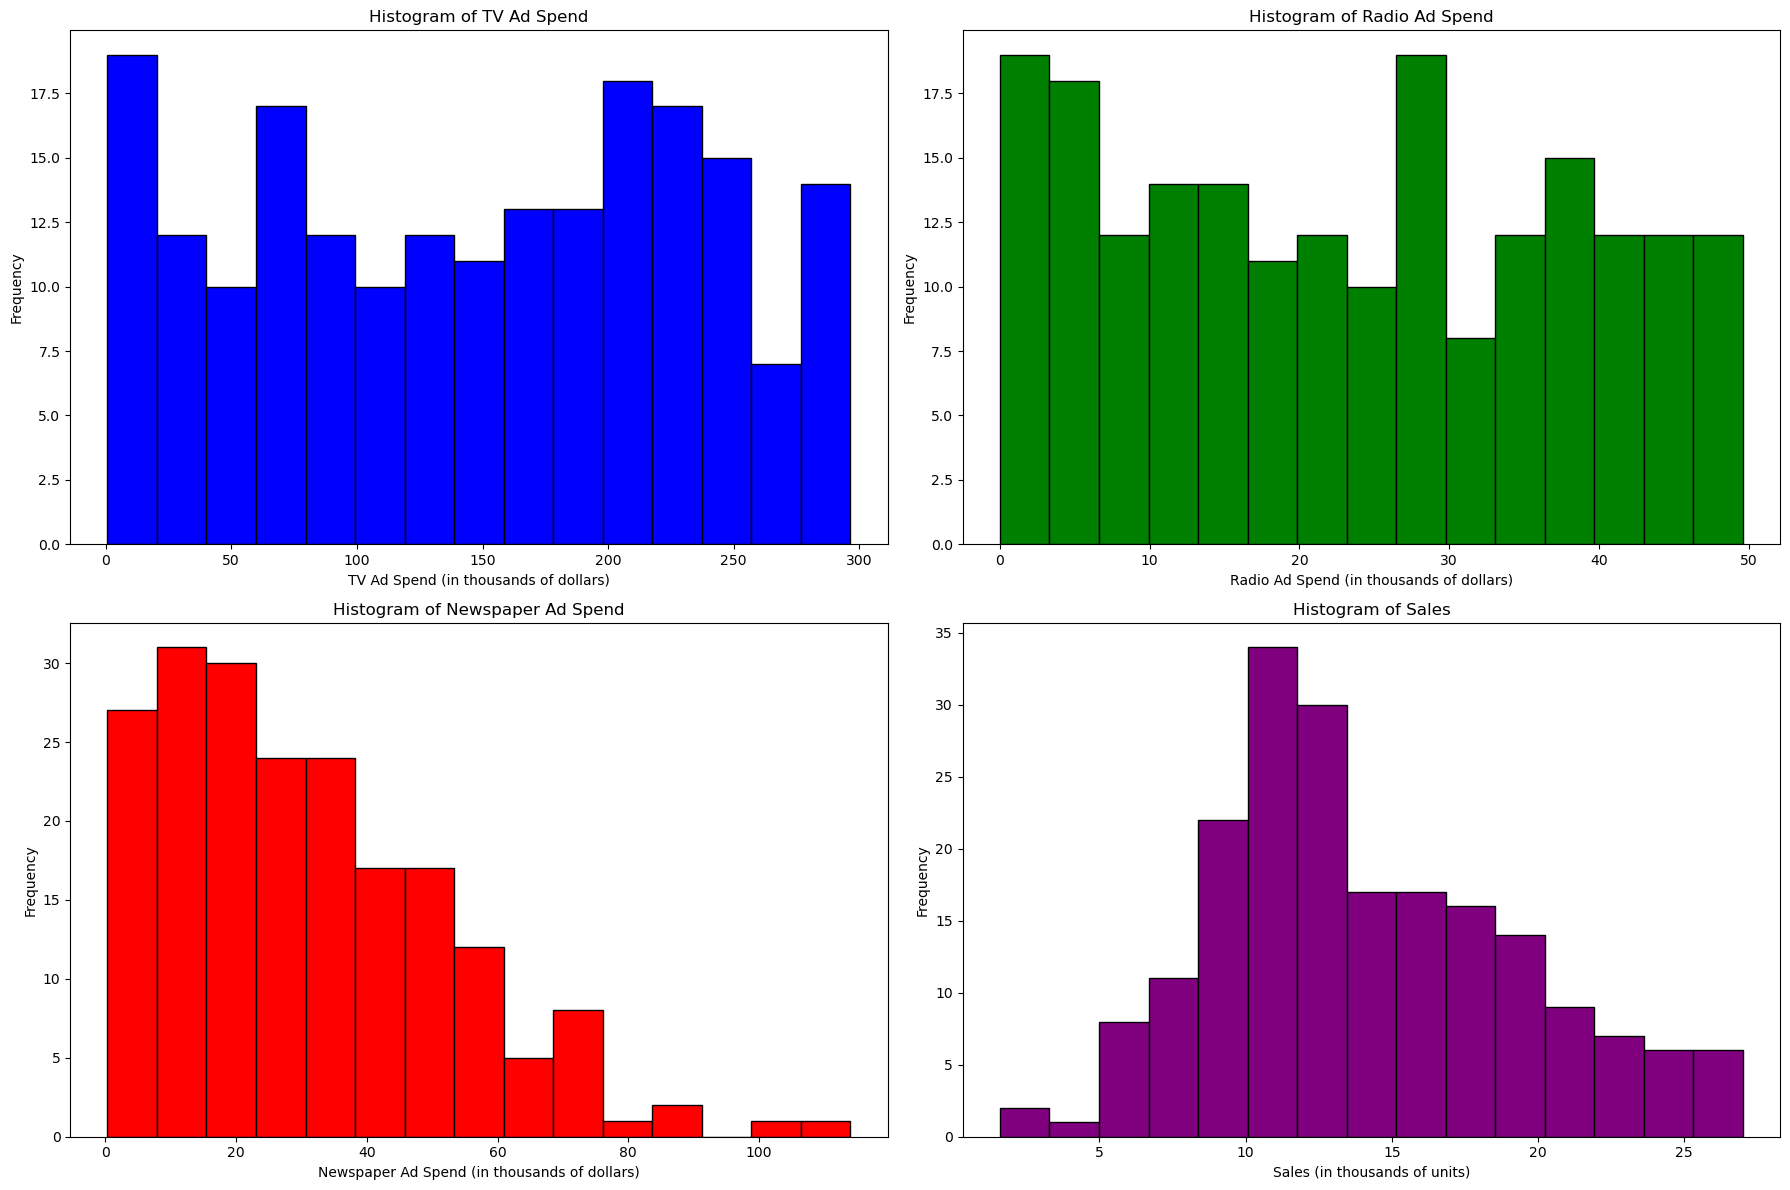

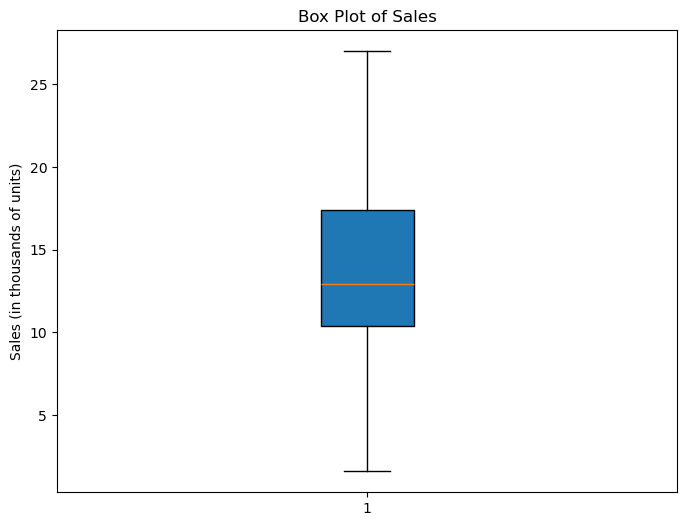

In [27]:
# Update the plots with correct labels indicating the units

plt.figure(figsize=(18, 12))

# TV Ad Spend Histogram
plt.subplot(2, 2, 1)
plt.hist(df['TV'], bins=15, color='blue', edgecolor='black')
plt.title('Histogram of TV Ad Spend')
plt.xlabel('TV Ad Spend (in thousands of dollars)')
plt.ylabel('Frequency')

# Radio Ad Spend Histogram
plt.subplot(2, 2, 2)
plt.hist(df['Radio'], bins=15, color='green', edgecolor='black')
plt.title('Histogram of Radio Ad Spend')
plt.xlabel('Radio Ad Spend (in thousands of dollars)')
plt.ylabel('Frequency')

# Newspaper Ad Spend Histogram
plt.subplot(2, 2, 3)
plt.hist(df['Newspaper'], bins=15, color='red', edgecolor='black')
plt.title('Histogram of Newspaper Ad Spend')
plt.xlabel('Newspaper Ad Spend (in thousands of dollars)')
plt.ylabel('Frequency')

# Sales Histogram
plt.subplot(2, 2, 4)
plt.hist(df['Sales'], bins=15, color='purple', edgecolor='black')
plt.title('Histogram of Sales')
plt.xlabel('Sales (in thousands of units)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Box Plot of Sales with updated label
plt.figure(figsize=(8, 6))
plt.boxplot(df['Sales'], patch_artist=True)
plt.title('Box Plot of Sales')
plt.ylabel('Sales (in thousands of units)')
plt.show()